 
# NETWORK BIOLOGY 
  
## Assignment 1

####  Submitted By: 
#####  Divyanshu Srivastava (MT16125)


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

##### Question 1 - Watts and Strogatz small world network model

In [73]:
# Regular graph initialization
nodes = 1000
k = 10

adj = np.zeros([nodes, nodes])

for i in range(0, nodes):
    for j in range(1, k/2 + 1):
        adj[i, (i+j) % nodes] = 1
        adj[(i+j) % nodes, i] = 1  

edgelist = np.zeros([nodes*k/2, 2])
iterator = 0

for i in range(0, nodes-1):
    for j in range(i+1, nodes):
        if adj[i, j] == 1:
            edgelist[iterator, 0] = i
            edgelist[iterator, 1] = j
            iterator += 1

G = nx.Graph()
G.add_edges_from(edgelist)
# print adj
# print sum(adj)
# G = nx.random_regular_graph(k, nodes)
G_copy = G

# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# #nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

In [74]:
# plt.clf()
# pos=nx.spring_layout(G) # positions for all nodes
# nx.draw(G, pos)
# nx.draw_networkx_labels(G, pos)
# plt.title('Initial Regular Graph')
# plt.show()

prob = list()
prob.append(0.0001)
while prob[-1] < 1:
    prob.append(prob[-1]*2.303)
prob = prob[0:-1]

L = np.zeros([1, len(prob)+1])[0]
C = np.zeros([1, len(prob)+1])[0]

G = G_copy

L[0] = nx.average_shortest_path_length(G)
C[0] = nx.average_clustering(G)


count = 5

L_temp = np.zeros([1, count])[0]
C_temp = np.zeros([1, count])[0]

iterator = 1
for p in prob:
    print p
    for c in range(count):
        G = G_copy
        for n in G.nodes():
            for e in G.edges(n):
                if np.random.rand() < p:
                    ## perform rewiring
                    neighbours = np.array(G.edges(n))[:,1]
                    new_node = np.random.randint(1, high=nodes+1)
                    while new_node in neighbours:
                        new_node = np.random.randint(1, high=nodes+1)
                    G.remove_edge(e[0], e[1])
                    G.add_edge(e[0], new_node)
                    if not nx.is_connected(G):
                        G.remove_edge(e[0], new_node)
                        G.add_edge(e[0], e[1])
        L_temp[c] = nx.average_shortest_path_length(G)
        C_temp[c] = nx.average_clustering(G)

    L[iterator] = np.average(L_temp)
    C[iterator] = np.average(C_temp)
    iterator += 1


## TODO: Capture graph disconnected condition on rewiring

# L /= L[0]
# C /= C[0]

0.0001
0.0002303
0.0005303809
0.0012214672127
0.00281303899085
0.00647842879592
0.014919821517
0.0343603489537
0.0791318836403
0.182240728024
0.419700396638
0.966570013458


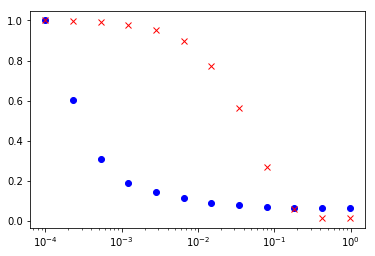

In [78]:
ln = L[0:12]
ln = ln/L[0]
cn = C[0:12]
cn = cn/C[0]

plt.semilogx(prob, ln, 'bo', prob, cn, 'rx')

plt.show()

#### Question 2 - Barabasi Albert Model


In [9]:
max_nodes = 1000

G = nx.Graph([[0, 1]])

for x in range(max_nodes):
    p = np.zeros([1, len(G.nodes())])[0]
    

[(0, 1)]

In [12]:
G.degree_iter

<bound method Graph.degree_iter of <networkx.classes.graph.Graph object at 0x7f18342ed490>>

In [ ]:
()